## Spherical Harmonics

- Scipy Library:[Source](https://docs.scipy.org/doc/scipy/reference/special.html)

In this notebook we are going to make some fun with Spherical Harmonics.

In [3]:
import numpy as np
from scipy.special import jn, yn, jn_zeros, yn_zeros
import scipy as sci
import scipy.special as sp

In [6]:
from __future__ import division

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
%matplotlib inline
import seaborn as sns
sns.set()

### Spherical Harmonics

\\( Y^m_n(\theta,\phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}}
  e^{i m \theta} P^m_n(\cos(\phi)) \\)

Some Examples

\\( Y_0^0(\theta, \phi) = \frac{1}{2} \sqrt{\frac{1}{\pi}} \\)

\\( Y_1^{-1}(\theta, \phi) = \frac{1}{2} \sqrt{\frac{3}{2\pi}}
                            e^{-i\theta} \sin(\phi) \\)
                            
\\( Y_1^0(\theta, \phi) = \frac{1}{2} \sqrt{\frac{3}{\pi}}
                         \cos(\phi) \\)
                         
\\( Y_1^1(\theta, \phi) = -\frac{1}{2} \sqrt{\frac{3}{2\pi}}
                         e^{i\theta} \sin(\phi) \\)

In [9]:
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] 
#arrays of angular variables

#### Spherical Harmonics : Y(1,0)

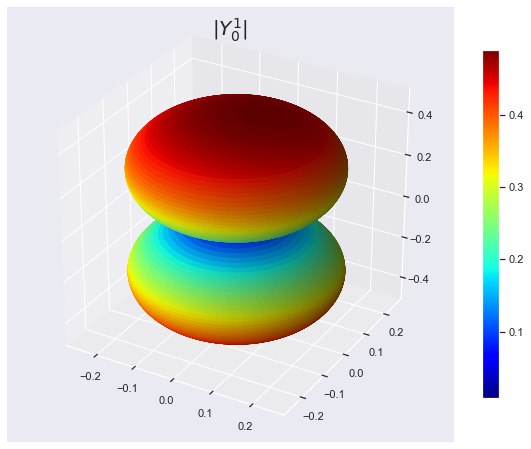

In [10]:
l = 1    #degree
m = 0   #order
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) 

#Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

# Normalize R for the plot colors to cover the entire range of colormap.
N = R/R.max()    
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),\
                       figsize=(10,8))

im = ax.plot_surface(X, Y, Z, rstride=1,\
                     cstride=1, facecolors=cm.jet(N))

ax.set_title(r'$|Y^1_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    


# Assign the unnormalized data array to the mappable
#so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);


-----------

#### Spherical Harmonics :  Y(2,0) and Y(2,1)

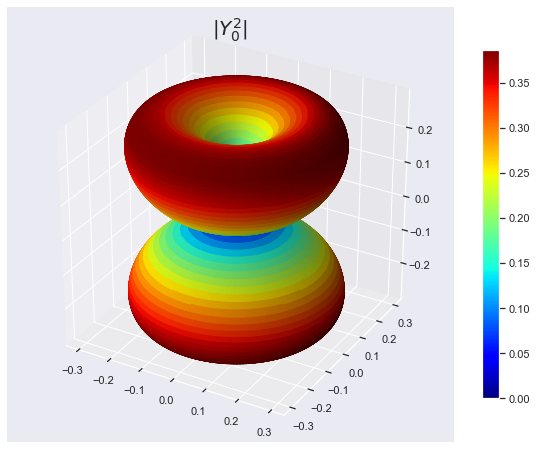

In [11]:
l = 2   #degree
m = 1  # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] 
#arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) 
#Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    
# Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),\
                       figsize=(10,8))

im = ax.plot_surface(X, Y, Z, rstride=1,\
                     cstride=1, facecolors=cm.jet(N))

ax.set_title(r'$|Y^2_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)

# Assign the unnormalized data array to the mappable
#so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);


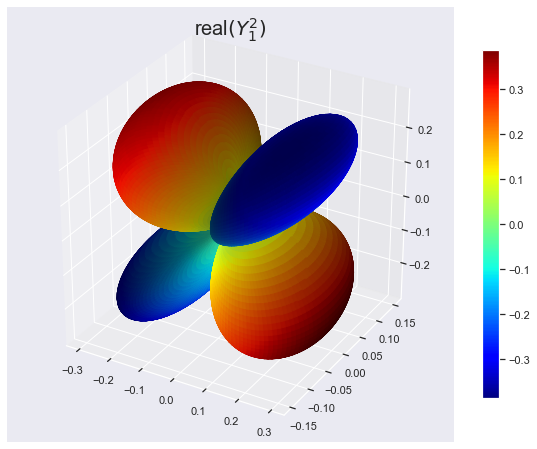

In [12]:
l = 2    # degree
m = 1    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/\
#normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 1)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

-------

#### Spherical Harmonics :  Y(4,2)

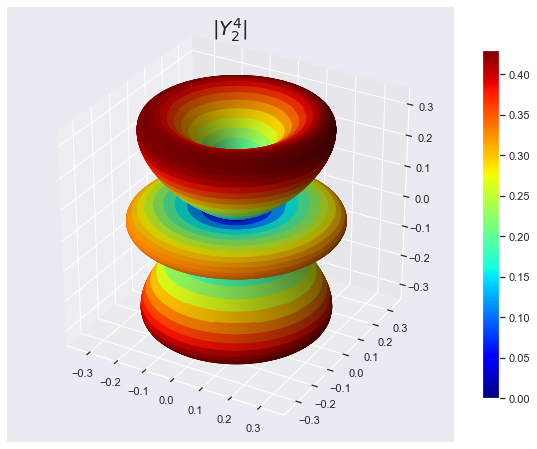

In [15]:
l = 4   #degree
m = 2  # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] 
#arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) 
#Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    
# Normalize R for the plot colors to cover 
# the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),\
                       figsize=(10,8))

im = ax.plot_surface(X, Y, Z, rstride=1,\
                     cstride=1,\
                     facecolors=cm.jet(N))

ax.set_title(r'$|Y^4_ 2|$', fontsize=20)

m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    
# Assign the unnormalized data array to the mappable
#so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

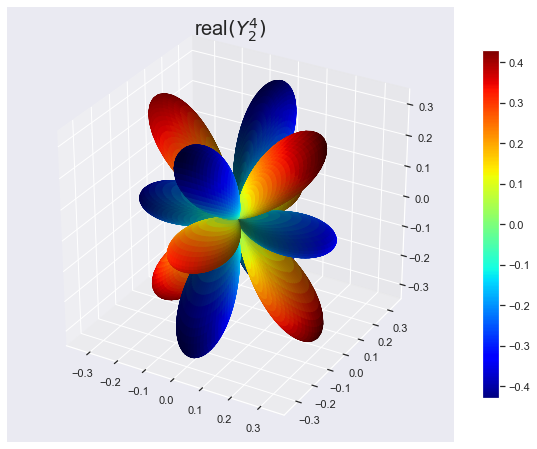

In [16]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/\
#normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),\
                       figsize=(10,8))

m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1,\
                cstride=1,\
                facecolors=cm.jet(norm(R)))

ax.set_title('real$(Y^4_ 2)$', fontsize=20)

m.set_array(R)
fig.colorbar(m, shrink=0.8);

#### References
1. https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane
2. https://www.exoruskoh.me/single-post/2017/05/24/Vibrating-Membranes-and-Fancy-Animations
3. https://www.acs.psu.edu/drussell/Demos/MembraneCircle/Circle.html
4. http://balbuceosastropy.blogspot.com/2015/06/spherical-harmonics-in-python.html